# Objective

### Building a churn model using an ANN.

In [1]:
from sklearn.preprocessing import LabelEncoder,OneHotEncoder
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.cross_validation import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix,classification_report
from keras.layers import BatchNormalization
from keras.models import Sequential
from keras.layers import Dropout
from keras.layers import Dense
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import collections
import warnings
warnings.filterwarnings("ignore")

C:\ProgramData\Anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [2]:
input_path = "D:/Sachin/telco-customer-churn"
input_filename = "WA_Fn-UseC_-Telco-Customer-Churn.csv"

#### Loading the data

In [3]:
data = pd.read_csv(input_path+"/"+input_filename,sep=',')

#### Viewing the data

In [4]:
data.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


#### Checking the datatype of all the features

In [5]:
data.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

#### Changing the datatype of the column from string to float

In [6]:
data["TotalCharges"] = pd.to_numeric(data["TotalCharges"],errors="coerce")

#### To check the number of null values in the dataset

In [7]:
data.isnull().sum()

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

#### Summary of the data

In [8]:
summary = data.describe(include=["O"])
summary

,customerID,gender,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Churn
count,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043
unique,7043,2,2,2,2,3,3,3,3,3,3,3,3,3,2,4,2
top,2657-VPXTA,Male,No,No,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,No
freq,1,3555,3641,4933,6361,3390,3096,3498,3088,3095,3473,2810,2785,3875,4171,2365,5174


#### From the summary table,it is clear that the following features are categorical:

Gender,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,
DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod 

#### Dropping rows with any null value

In [9]:
data.dropna(how="any",inplace=True)

####  Rechecking for any null values in the dataset

In [10]:
data.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

#### Splitting Continuous And Categorical Variables

In [11]:
data_cont = ['tenure','MonthlyCharges', 'TotalCharges']
data_cat = ['gender', 'SeniorCitizen', 'Partner', 'Dependents',
            'PhoneService', 'MultipleLines', 'InternetService',
            'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
            'TechSupport','StreamingTV','StreamingMovies',
            'Contract', 'PaperlessBilling','PaymentMethod']

#### Plotting Distribution Of The Data

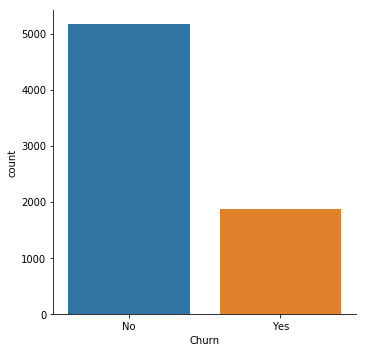

In [12]:
sns.catplot(x="Churn", kind="count", data=data,orient='h')

#### Count Plot Of All Categorical Variables With Churn

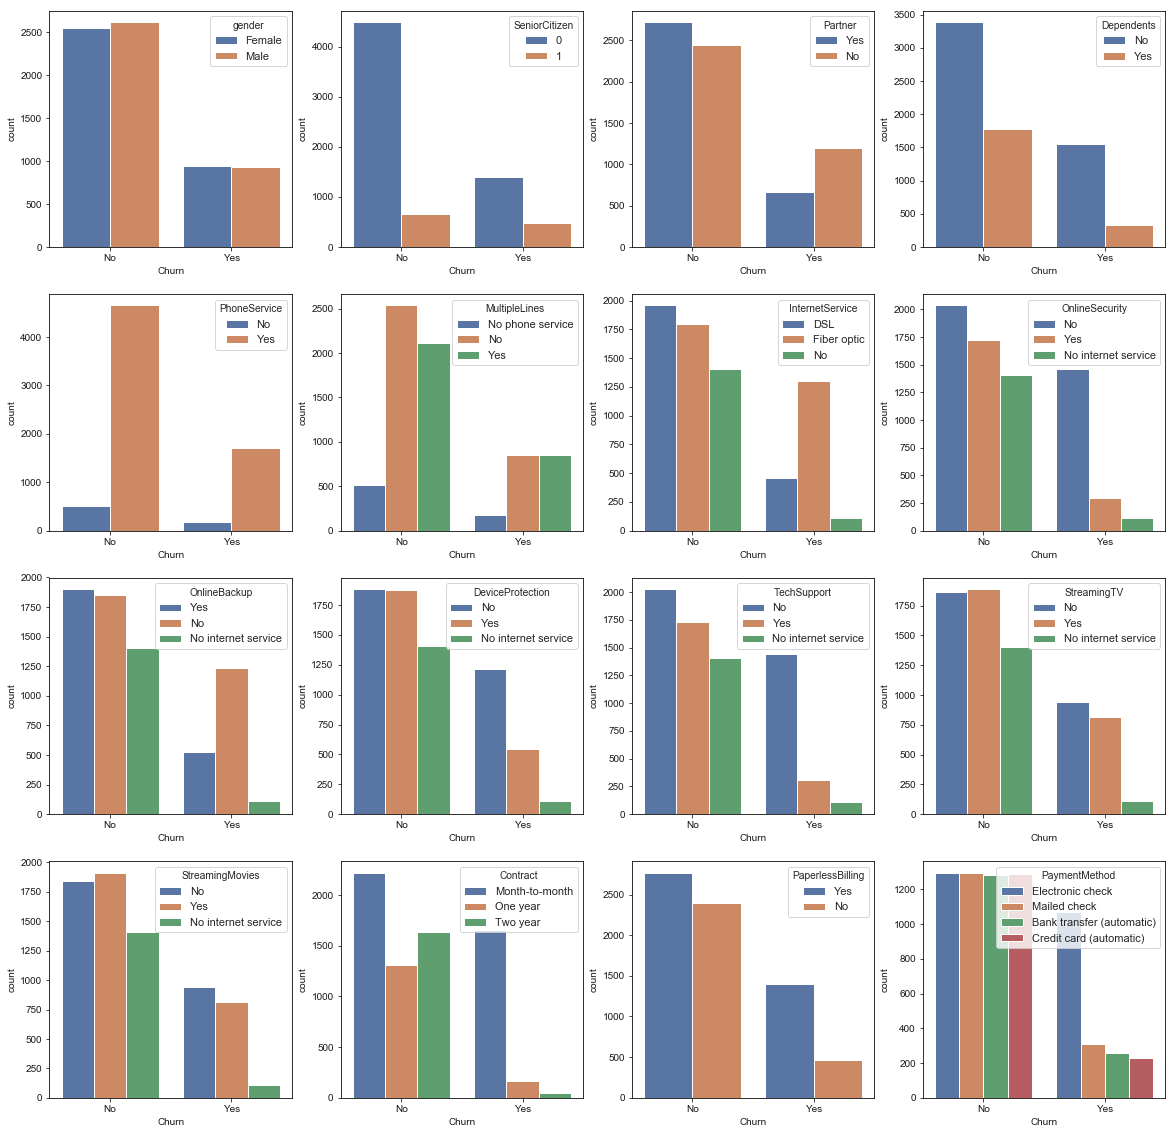

In [13]:
fig , ax = plt.subplots(4,4,figsize=(20,20))
sns.set(style="ticks", color_codes=True)
for axis,col in zip(ax.flat,data_cat):
    sns.countplot(x=data["Churn"],hue=data[col],ax=axis)

#### Checking For Outliers In Numeric Variables

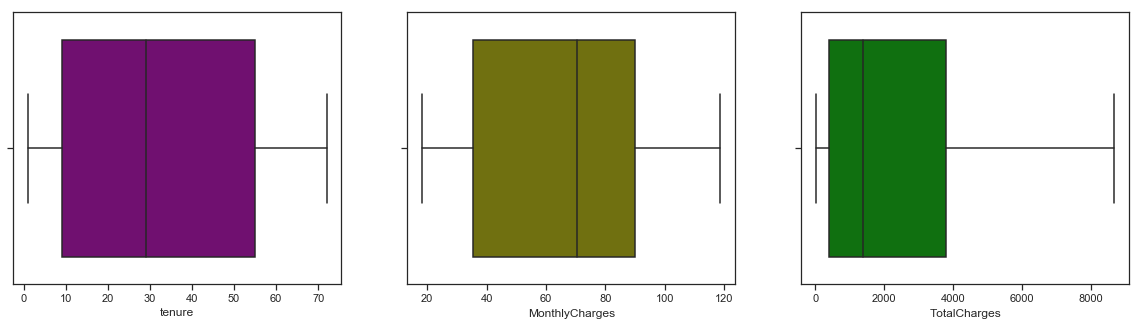

In [14]:
fig,ax = plt.subplots(1, 3, figsize=(20,5))
sns.boxplot(x=data["tenure"], orient="h", color="purple",ax=ax[0])
sns.boxplot(x=data["MonthlyCharges"], orient="h", color="olive",ax=ax[1])
sns.boxplot(x=data["TotalCharges"] , orient="h", color="green",ax=ax[2])

Clearly there are no outliers in the data

#### Vizualizing the Numeric variables

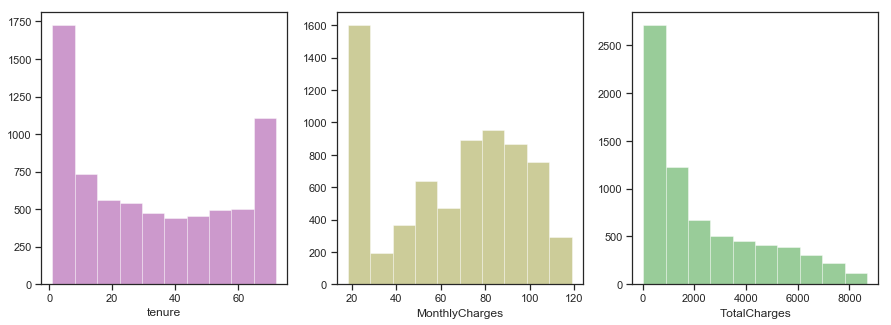

In [15]:
fig,ax = plt.subplots(1,3,figsize=(15,5))

sns.distplot(data["tenure"],bins=10,kde=False,color="purple",ax=ax[0])
sns.distplot(data["MonthlyCharges"],bins=10,kde=False,color="olive",ax=ax[1])
sns.distplot(data["TotalCharges"],bins=10,kde=False,color="green",ax=ax[2])

#### Correlation between churn and numerical variables

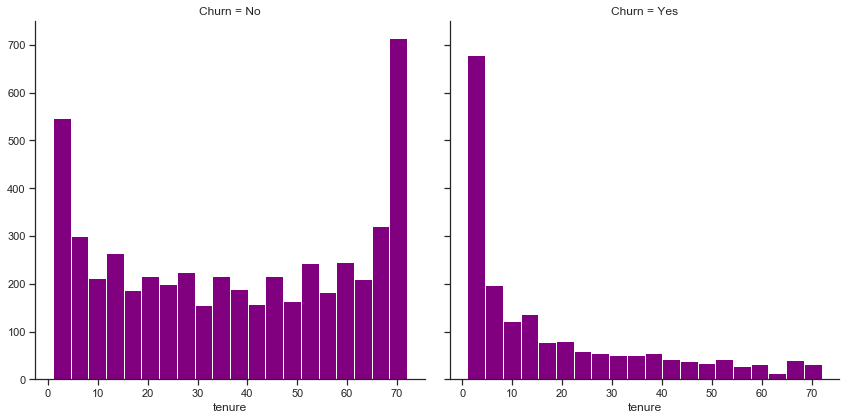

In [16]:
NumHistTenure = sns.FacetGrid(data,col="Churn",height=6,aspect=1)
NumHistTenure = NumHistTenure.map(plt.hist, "tenure",bins=20,color="purple")

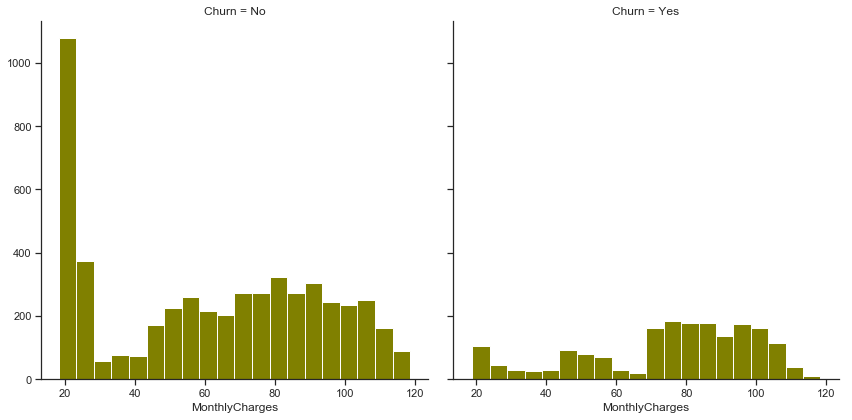

In [17]:
NumHistMC = sns.FacetGrid(data,col="Churn",height=6,aspect=1)
NumHistMC = NumHistMC.map(plt.hist, "MonthlyCharges",bins=20,color="olive")

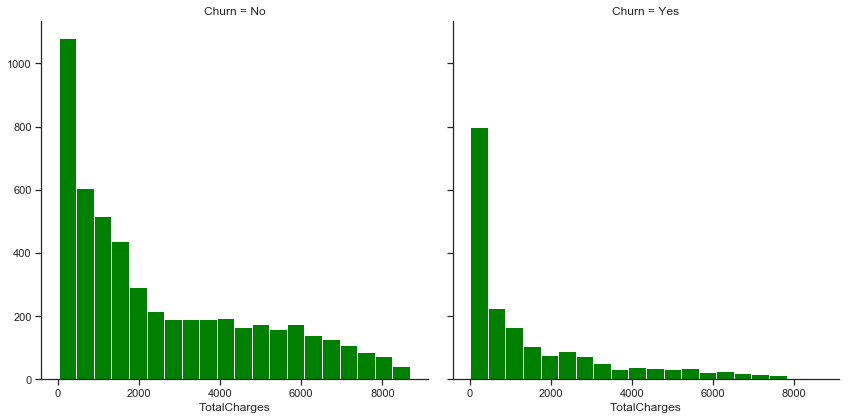

In [18]:
NumHistTC = sns.FacetGrid(data,col="Churn",height=6,aspect=1)
NumHistTC = NumHistTC.map(plt.hist, "TotalCharges",bins=20,color="green")

#### Instantiating a scalar and scaleing the data.

In [19]:
scaler = StandardScaler()
data_continuous = scaler.fit_transform(data[data_cont])

#### Instantiating an encoder and encoding the data.

In [20]:
for cols in data_cat:
    data.loc[:,cols] = LabelEncoder().fit_transform(data.loc[:,cols])

onehotencoder = OneHotEncoder(sparse=False)
data_categorical = onehotencoder.fit_transform(data[data_cat])

#### Concatenate Processed Continuous And Categorical Columns Back Together

In [21]:
features = np.concatenate([data_continuous, data_categorical], axis=1)

target = data.iloc[:,20:].values
target = LabelEncoder().fit_transform(target)

#### Splitting data to test and train

In [22]:
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size = 0.2, random_state = 0)

### Building a sequential model

In [23]:
classifier = Sequential()
classifier.add(Dense(units=6,kernel_initializer="uniform",activation="relu",input_shape=(46,)))
classifier.add(BatchNormalization(axis=-1, momentum=0.99, epsilon=0.001, center=True, scale=True))
classifier.add(Dense(units=6,kernel_initializer="uniform",activation="relu"))
classifier.add(BatchNormalization(axis=-1, momentum=0.99, epsilon=0.001, center=True, scale=True))
classifier.add(Dense(units=6,kernel_initializer="uniform",activation="relu"))
classifier.add(BatchNormalization(axis=-1, momentum=0.99, epsilon=0.001, center=True, scale=True))
classifier.add(Dropout(0.2))
classifier.add(Dense(units=1,kernel_initializer="uniform",activation="sigmoid"))
classifier.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

#### Training the classifier

In [28]:
classifier.fit(X_train, y_train, batch_size = 100, nb_epoch = 100)

Epoch 1/100
5625/5625 [==============================] - 0s 22us/step - loss: 0.3973 - acc: 0.8126
Epoch 2/100
5625/5625 [==============================] - 0s 26us/step - loss: 0.4014 - acc: 0.8057
Epoch 3/100
5625/5625 [==============================] - 0s 23us/step - loss: 0.4029 - acc: 0.8117
Epoch 4/100
5625/5625 [==============================] - 0s 22us/step - loss: 0.3999 - acc: 0.8124
Epoch 5/100
5625/5625 [==============================] - 0s 25us/step - loss: 0.4003 - acc: 0.8071
Epoch 6/100
5625/5625 [==============================] - 0s 28us/step - loss: 0.4012 - acc: 0.8121
Epoch 7/100
5625/5625 [==============================] - 0s 22us/step - loss: 0.4014 - acc: 0.8030
Epoch 8/100
5625/5625 [==============================] - 0s 23us/step - loss: 0.4000 - acc: 0.8101
Epoch 9/100
5625/5625 [==============================] - 0s 22us/step - loss: 0.3981 - acc: 0.8098
Epoch 10/100
5625/5625 [==============================] - 0s 25us/step - loss: 0.3978 - acc: 0.8123
Epoch 11/

5625/5625 [==============================] - 0s 25us/step - loss: 0.3995 - acc: 0.8055
Epoch 84/100
5625/5625 [==============================] - 0s 31us/step - loss: 0.3964 - acc: 0.8094
Epoch 85/100
5625/5625 [==============================] - 0s 25us/step - loss: 0.3972 - acc: 0.8096
Epoch 86/100
5625/5625 [==============================] - 0s 25us/step - loss: 0.3990 - acc: 0.8092
Epoch 87/100
5625/5625 [==============================] - 0s 26us/step - loss: 0.3978 - acc: 0.8137
Epoch 88/100
5625/5625 [==============================] - 0s 23us/step - loss: 0.3992 - acc: 0.8039
Epoch 89/100
5625/5625 [==============================] - 0s 25us/step - loss: 0.3952 - acc: 0.8116
Epoch 90/100
5625/5625 [==============================] - 0s 25us/step - loss: 0.3934 - acc: 0.8087
Epoch 91/100
5625/5625 [==============================] - 0s 26us/step - loss: 0.3971 - acc: 0.8100
Epoch 92/100
5625/5625 [==============================] - 0s 25us/step - loss: 0.3976 - acc: 0.8116
Epoch 93/100


#### Prediciting churn

In [29]:
y_pred = classifier.predict(X_test)
y_pred = (y_pred > 0.5)

#### Classification Report

In [30]:
print(classification_report(y_test,y_pred))

             precision    recall  f1-score   support

          0       0.83      0.89      0.86      1038
          1       0.62      0.50      0.55       369

avg / total       0.78      0.79      0.78      1407



#### Genreating a confusion matrix to evaluate the results

Text(89.18,0.5,'predicted label')

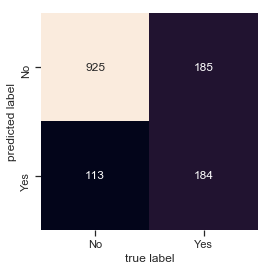

In [31]:
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm.T,square=True, annot=True, fmt='d', cbar=False,xticklabels=['No','Yes'],yticklabels=['No','Yes'] )
plt.xlabel('true label')
plt.ylabel('predicted label')